In [66]:
#Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

In [67]:
df = pd.read_csv("Hitters.csv")

df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [68]:
df = df.dropna()

dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])

y = df["Salary"]

X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis=1).astype("float64")

X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [69]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,True,True,True
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,False,True,False
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,True,False,True
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,True,False,True
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,False,True,False


In [70]:
lambdas = 10**np.linspace(10,-2,100)*0.5

In [71]:
ridge_model = Ridge()

parameters = []

for i in lambdas:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(X_train,y_train)
    parameters.append(ridge_model.coef_)

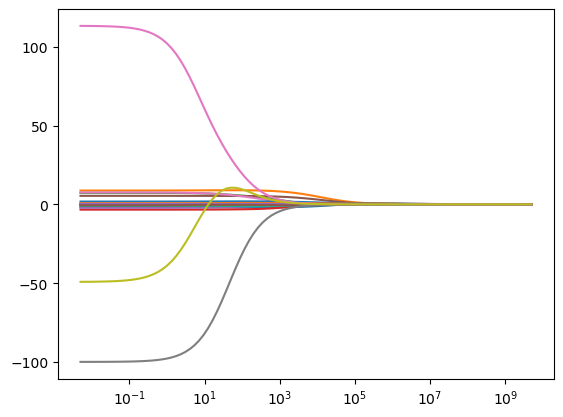

In [72]:
ax = plt.gca()

ax.plot(lambdas, parameters)

ax.set_xscale("log")

In [73]:
ridge_model = Ridge().fit(X_train, y_train)

In [74]:
train_predict = ridge_model.predict(X_train)

In [75]:
#Train error
rmse = np.sqrt(mean_squared_error(y_train, train_predict))

rmse

289.34470696006565

In [76]:
#Test error
test_predict = ridge_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,test_predict))

rmse

356.80829057302293

In [77]:
lambdas2 = np.random.randint(0,1000,100)

In [78]:
ridgecv = RidgeCV(alphas=lambdas, scoring="neg_mean_squared_error" , cv=10)
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, scoring='neg_mean_squared_error')

In [79]:
ridgecv.alpha_

1526927.7544167063

In [80]:
final_model = Ridge(alpha=ridgecv.alpha_).fit(X_train,y_train)

In [81]:
#Test error

test_predict = final_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,test_predict))

rmse

385.8643856146929

In [82]:
ridgecv = RidgeCV(alphas=lambdas2, scoring="neg_mean_squared_error" , cv=10)
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([854, 203, 691, 520,  39, 637, 328, 951, 160, 450, 540, 882,  68,
       304, 359, 736, 609, 776, 196, 332, 423, 788, 738, 183, 964,  71,
       216, 916, 481, 302, 756, 845, 418, 109, 238, 654, 990, 185, 823,
        59, 473, 951, 316, 242, 457, 855, 657, 841, 214, 443, 719, 984,
       112,  86, 932, 935, 870, 764, 327, 365, 352, 928, 635,  72,  89,
       780,  76, 360, 550, 790, 976, 913, 261, 389, 146, 265, 770, 667,
       695, 128, 146, 357, 536, 585, 265, 617, 575, 225, 736, 108,  77,
       862, 312, 772, 548, 399, 518, 474, 515, 831]),
        cv=10, scoring='neg_mean_squared_error')

In [83]:
final_model = Ridge(alpha=ridgecv.alpha_).fit(X_train,y_train)

In [84]:
#Test error
test_predict = final_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,test_predict))

rmse

356.8793455495986